In [ ]:
import os
import re
import glob
import numpy  as np
import pandas as pd

from os.path import expandvars, join, basename

import matplotlib.pyplot as plt
%matplotlib widget

particle_masses = {1:0.510998, 2:105.6583}

In [5]:
pid   = 1
qeeff = 0.7
indir = expandvars(f"$LUSTRE/QEEff/{'e-' if pid==1 else ('mu-' if pid == 2 else 'pi+')}/{qeeff}")
mass  = particle_masses[pid]

fitqun = dict()
filenames = glob.glob(join(indir, "*.csv"))
for filename in filenames: # loop on momentum
    energy = float(re.findall(r'\d+(?:\.\d+)?', basename(filename))[0])
    df = pd.read_csv(filename)
    fitqun[energy] = df.loc[df.pid == pid]

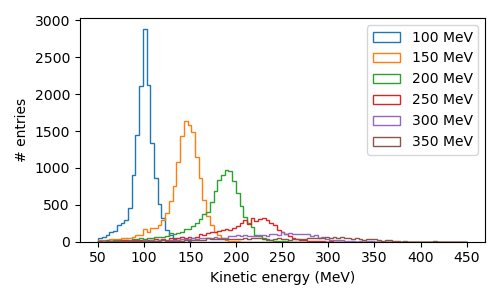

In [6]:
contained = True
ebins = np.linspace(50, 450, 100)

plt.figure(figsize=(5, 3))

for i, energy in enumerate(sorted(fitqun.keys())):
    df = fitqun[energy]
    if contained: df = df.loc[df.pc == 0]
    K = ((df.p**2 + mass**2)**0.5 - mass).values
    err = abs(K - energy)/energy
    
    plt.hist(K, bins=ebins, label=f"{int(energy)} MeV", histtype="step")

plt.xlabel("Kinetic energy (MeV)")
plt.ylabel("# entries")
plt.legend()
plt.tight_layout()